# RhythmPerceptionQuestionsGenerator
Author: AHuiXiQue

In [235]:
import music21 as mus
from random import randint
import os
from PIL import Image, ImageDraw, ImageFont
from moviepy.editor import ImageClip, AudioFileClip, concatenate_videoclips
import numpy as np

In [2]:
mus.environment.set("musescoreDirectPNGPath","D:/MyFiles/Softwares/MuseScore/bin/MuseScore4.exe")
mus.environment.set("musicxmlPath","D:/MyFiles/Softwares/MuseScore/bin/MuseScore4.exe")

In [107]:
MusescorePath="D:/MyFiles/Softwares/MuseScore/bin/MuseScore4.exe"

## rhythm mode that appeared in final video  
in OneBeat1 and TwoBeat1, the first note can be tied to the note before it, or be a rest  
in 2, they cannot

In [ ]:
OneBeat1=["a8 a8","a16 a16 a16 a16","a16 a16 a8","a8 a16 a16","a8. a16"] # 0-4
OneBeat2=["a16 a8.","a16 a8 a16","trip{a8 a a}"] # 5-7
TwoBeat1=["a8 a4 a8","a8 a4 a16 a16"] # 8-9
TwoBeat2=["a16 a16 a4 a8","a16 a16 a4 a16 a16","a4. a8","a4. a16 a16","a8 a4.","a16 a16 a4."] # 10-15

In [36]:
print(len(OneBeat1),len(OneBeat2),len(TwoBeat1),len(TwoBeat2))

5 3 2 6


In [45]:
RhythmModes=OneBeat1+OneBeat2+TwoBeat1+TwoBeat2

## randomly choose the modes

In [40]:
def ARandomMeasure():
    r=[randint(0,15) for i in range(2)]
    if r[0]>=8 and r[1]>=8:
        return r
    if r[0]>=8 and r[1]<=7:
        return r+[randint(0,7)]
    if r[0]<=7 and r[1]>=8:
        return r+[randint(0,7)]
    if r[0]<=7 and r[1]<=7:
        r2=randint(0,15)
        if r2<=7: return r+[r2,randint(0,7)]
        else: return r+[r2]

In [43]:
def Random4Measure():
    return ARandomMeasure()+ARandomMeasure()+ARandomMeasure()+ARandomMeasure()

In [71]:
def Random4MeasureInTinynotation():
    return " ".join([RhythmModes[i] for i in Random4Measure()])

def Random4MeasureWithTiesAndRestsInTinynotation():
    rd4m=Random4Measure()
    tie=[]
    rest=[]
    for i in range(1,len(rd4m)):
        if (rd4m[i]>=0 and rd4m[i]<=4) or (rd4m[i]>=8 and rd4m[i] <=9):
            r=randint(0,2)
            if r==1: tie.append(i)
            if r==2: rest.append(i)

    out=[RhythmModes[i] for i in rd4m]
    for i in tie:
        out[i-1]=out[i-1]+"~"
    for i in rest:
        out[i]="r"+out[i][1:]
    return " ".join(out)

## create musicxml and convert them to mp3 and png

### test

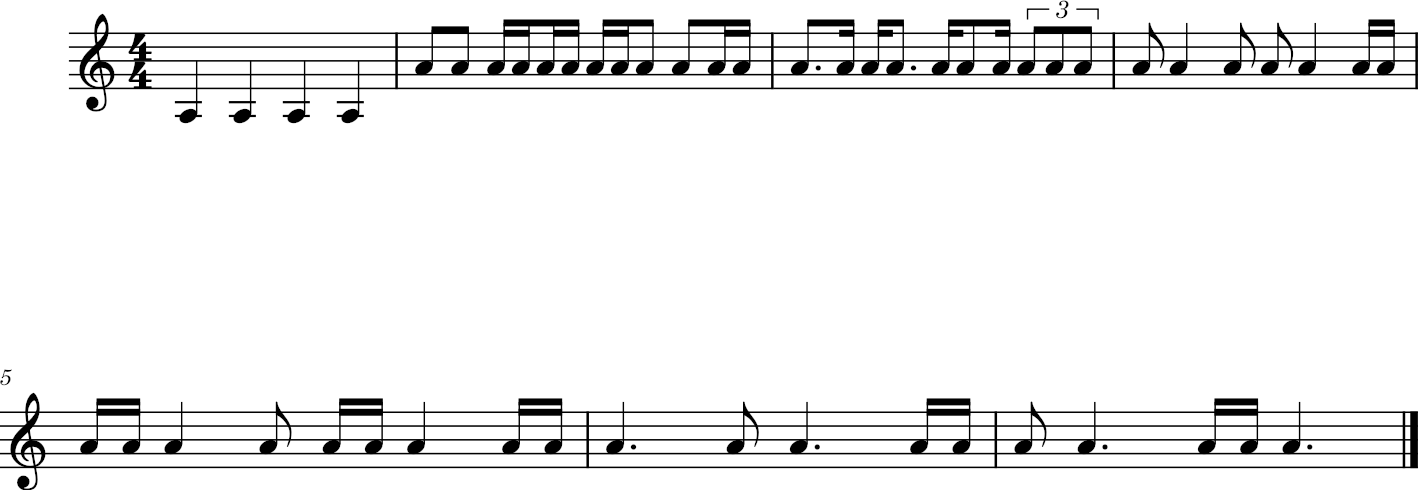

In [178]:
s1=mus.converter.parse("tinynotation: 4/4 "+"A4 A4 A4 A4 "+" ".join(RhythmModes))
s1.show()

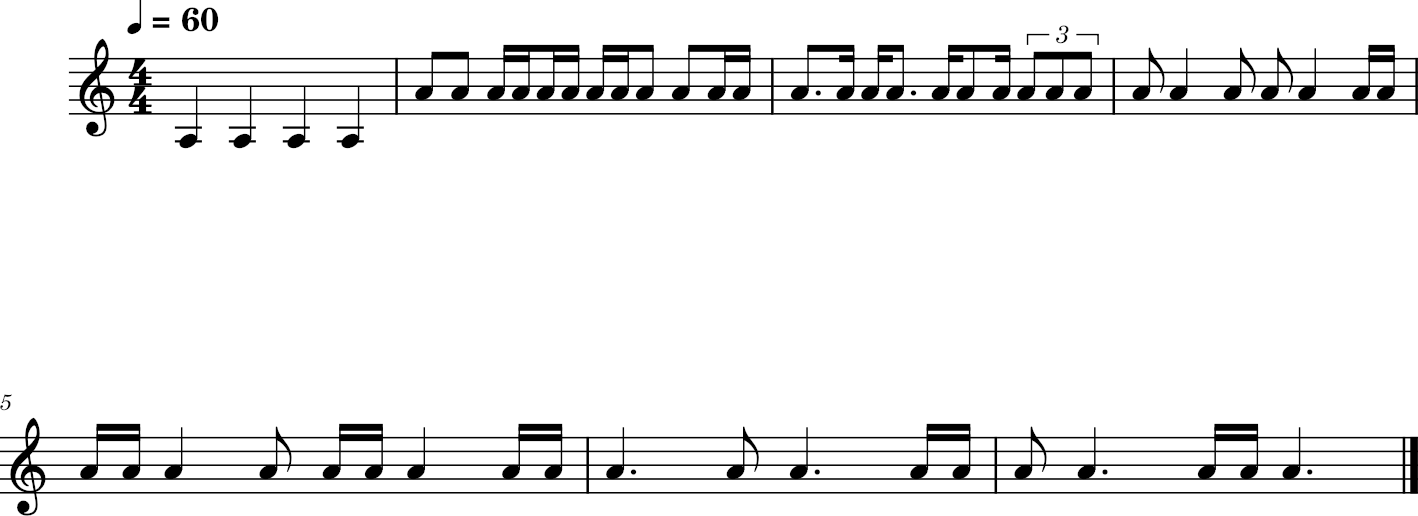

In [179]:
s1[0].insert(0,mus.tempo.MetronomeMark(number=60))
s1.insert(0,mus.instrument.Piano())
s1.show()

In [180]:
s1.write("musicxml",fp="test/1.xml")

WindowsPath('d:/MyFiles/WorkSpace/RhythmPerceptionQuestionsGenerator/test/1.xml')

In [181]:
os.system(MusescorePath+" -o test/1.mp3 test/1.xml")
os.system(MusescorePath+" -o test/1.png test/1.xml")

0

### create

In [185]:
# function used
def CreateAQuestion(RandomQuestion,QuestionIndex,FolderPath):
    question=RandomQuestion()
    SWithBeatTip=mus.converter.parse("tinynotation: 4/4 "+"A4 A4 A4 A4 "+question)
    SWithoutBeatTip=mus.converter.parse("tinynotation: 4/4 "+question)
    QuarterNum=randint(60,70)
    for s in [SWithBeatTip,SWithoutBeatTip]:
        s[0].insert(0,mus.tempo.MetronomeMark(number=QuarterNum))
        s.insert(0,mus.instrument.Piano())
    SWithBeatTip.write("musicxml",fp=FolderPath+"/MusicxmlForMp3/"+"{}.xml".format(QuestionIndex))
    SWithoutBeatTip.write("musicxml",fp=FolderPath+"/MusicxmlForPng/"+"{}.xml".format(QuestionIndex))
    os.system(MusescorePath+" -o "+FolderPath+"/Mp3/{}.mp3 ".format(QuestionIndex)+FolderPath+"/MusicxmlForMp3/{}.xml".format(QuestionIndex))
    os.system(MusescorePath+" -o "+FolderPath+"/Png/{}.png ".format(QuestionIndex)+FolderPath+"/MusicxmlForPng/{}.xml".format(QuestionIndex))

In [187]:
# test
CreateAQuestion(Random4MeasureWithTiesAndRestsInTinynotation,2,"test")

In [188]:
# for WithoutTR
for i in range(100):
    CreateAQuestion(Random4MeasureInTinynotation,i,"WithoutTR")

In [190]:
# for WithTR
for i in range(100):
    CreateAQuestion(Random4MeasureWithTiesAndRestsInTinynotation,i,"WithTR")

d:\MyFiles\Softwares\Anaconda\envs\VenvForMusic21\lib\site-packages\music21\stream\makeNotation.py: WARNING: got multi-tuplet duration; cannot yet handle this. (<music21.duration.Tuplet 3/2/eighth>, <music21.duration.Tuplet 3/2/eighth>)
d:\MyFiles\Softwares\Anaconda\envs\VenvForMusic21\lib\site-packages\music21\stream\makeNotation.py: WARNING: got multi-tuplet duration; cannot yet handle this. (<music21.duration.Tuplet 3/2/eighth>, <music21.duration.Tuplet 3/2/eighth>)
d:\MyFiles\Softwares\Anaconda\envs\VenvForMusic21\lib\site-packages\music21\stream\makeNotation.py: WARNING: got multi-tuplet duration; cannot yet handle this. (<music21.duration.Tuplet 3/2/eighth>, <music21.duration.Tuplet 3/2/eighth>)
d:\MyFiles\Softwares\Anaconda\envs\VenvForMusic21\lib\site-packages\music21\stream\makeNotation.py: WARNING: got multi-tuplet duration; cannot yet handle this. (<music21.duration.Tuplet 3/2/eighth>, <music21.duration.Tuplet 3/2/eighth>)
d:\MyFiles\Softwares\Anaconda\envs\VenvForMusic21\li

In [ ]:
for i in [6,24,28,58,69,71,78]:
    CreateAQuestion(Random4MeasureWithTiesAndRestsInTinynotation,i,"WithTR")

## create other asset

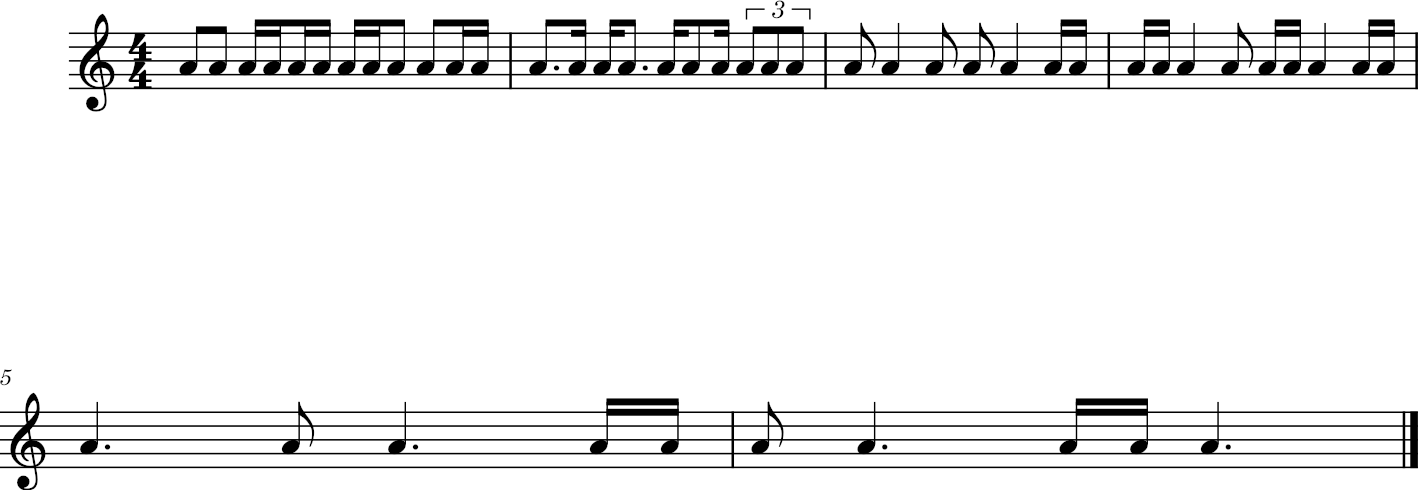

In [193]:
s=mus.converter.parse("tinynotation: 4/4 "+" ".join(RhythmModes))
s.show()

In [194]:
s.write("musicxml",fp="OtherAsset/cover.xml")

WindowsPath('d:/MyFiles/WorkSpace/RhythmPerceptionQuestionsGenerator/OtherAsset/cover.xml')

In [195]:
os.system(MusescorePath+" -o OtherAsset/cover.png OtherAsset/cover.xml")

0

In [199]:
16*186

2976

In [200]:
2976/16*9

1674.0

In [201]:
width=2976
height=1674

In [221]:
def GeneratePng(i,FolderPath):
    text=str(i)
    img=Image.new("RGB",(width,height),(254,223,225))
    font=ImageFont.truetype("simhei.ttf",size=500)
    #font=ImageFont.truetype("timesbd.ttf",size=500)
    draw=ImageDraw.Draw(img)
    #tw,th=draw.textsize(text,font)
    TextPosition=((width-600)//2,(height-500)//2)
    draw.text(TextPosition,text,fill=(0,0,0),font=font)
    img.save(FolderPath+"/{}.png".format(i))

In [222]:
# test
GeneratePng(23,"test")

In [223]:
for i in range(100):
    GeneratePng(i,"OtherAsset/BigNumber")

## create  the audios

In [252]:
def CreateVideo(CoverPath,FolderPath,NumOfQuestion):
    ScoreImgs=[np.array(Image.open(FolderPath+"/Png/{}-1.png".format(i)).crop((0,0,2975,1673))) for i in range(NumOfQuestion)]
    NumImgs=[np.array(Image.open("OtherAsset/BigNumber/{}.png".format(i)).crop((0,0,2975,1673))) for i in range(NumOfQuestion)]
    Audios=[AudioFileClip(FolderPath+"/Mp3/{}.mp3".format(i)) for i in range(NumOfQuestion)]
    clips=[]

    cover=np.array(Image.open(CoverPath).crop((0,0,2975,1673)))
    CoverClip=ImageClip(cover,duration=5)
    clips.append(CoverClip)

    for i in range(NumOfQuestion):
        clip1=ImageClip(NumImgs[i],duration=Audios[i].duration)
        clip2=ImageClip(ScoreImgs[i],duration=Audios[i].duration)
        clip1=clip1.set_audio(Audios[i])
        clip2=clip2.set_audio(Audios[i])
    
        clips.append(clip1)
        clips.append(clip2)

    FinalClip=concatenate_videoclips(clips)
    FinalClip.write_videofile(FolderPath+"/final.mp4",codec="libx264",audio_codec="aac",fps=2)    
    for c in clips: c.close()
    FinalClip.close()

In [ ]:
# test
#CreateAQuestion(Random4MeasureInTinynotation,0,"test")

In [253]:
# test
CreateVideo("OtherAsset/cover-1.png","test",3)

Moviepy - Building video test/final.mp4.
MoviePy - Writing audio in finalTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video test/final.mp4



Moviepy - Done !
Moviepy - video ready test/final.mp4


In [254]:
CreateVideo("OtherAsset/cover-1.png","WithoutTR",100)

Moviepy - Building video WithoutTR/final.mp4.
MoviePy - Writing audio in finalTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video WithoutTR/final.mp4



Moviepy - Done !
Moviepy - video ready WithoutTR/final.mp4


In [255]:
CreateVideo("OtherAsset/cover-1.png","WithTR",100)

Moviepy - Building video WithTR/final.mp4.
MoviePy - Writing audio in finalTEMP_MPY_wvf_snd.mp4


chunk:   1%|          | 1071/95063 [00:01<02:19, 674.60it/s, now=None]d:\MyFiles\Softwares\Anaconda\envs\VenvForMusic21\lib\site-packages\moviepy\audio\io\readers.py:197: UserWarning: Error in file WithTR/Mp3/0.mp3, At time t=22.70-22.75 seconds, indices wanted: 100000-101289, but len(buffer)=101146
index 101146 is out of bounds for axis 0 with size 101146
  warnings.warn("Error in file %s, "%(self.filename)+
chunk:  16%|█▋        | 15490/95063 [00:24<01:46, 743.93it/s, now=None]d:\MyFiles\Softwares\Anaconda\envs\VenvForMusic21\lib\site-packages\moviepy\audio\io\readers.py:197: UserWarning: Error in file WithTR/Mp3/16.mp3, At time t=22.69-22.73 seconds, indices wanted: 100000-101786, but len(buffer)=101643
index 101643 is out of bounds for axis 0 with size 101643
  warnings.warn("Error in file %s, "%(self.filename)+
chunk:  22%|██▏       | 21103/95063 [00:33<01:37, 757.56it/s, now=None]d:\MyFiles\Softwares\Anaconda\envs\VenvForMusic21\lib\site-packages\moviepy\audio\io\readers.py:197: 

MoviePy - Done.
Moviepy - Writing video WithTR/final.mp4



Moviepy - Done !
Moviepy - video ready WithTR/final.mp4
